In [1]:
library(MASS)
library(readr)
library(ggplot2)
library(corrplot)
library(mlbench)
library(Amelia)
#library(plotly)
library(reshape2)
#library(caret)
library(caTools)
library(dplyr)


corrplot 0.84 loaded
Loading required package: Rcpp
## 
## Amelia II: Multiple Imputation
## (Version 1.7.5, built: 2018-05-07)
## Copyright (C) 2005-2019 James Honaker, Gary King and Matthew Blackwell
## Refer to http://gking.harvard.edu/amelia/ for more information
## 

Attaching package: ‘dplyr’

The following object is masked from ‘package:MASS’:

    select

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



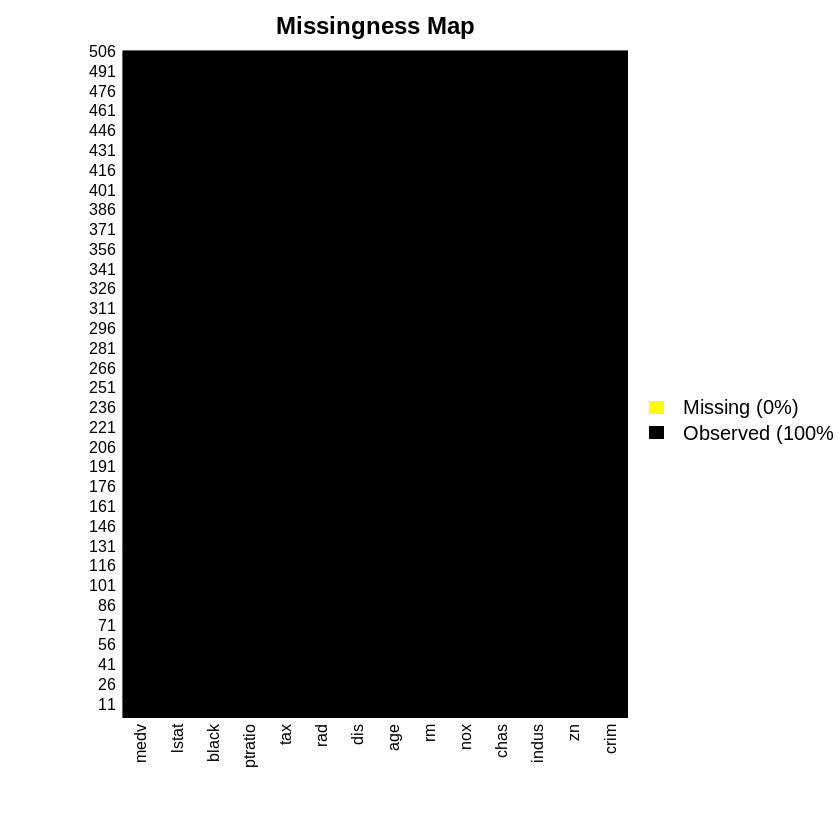

In [130]:


BostonHousing = Boston
missmap(BostonHousing,col=c('yellow','black'),legend=TRUE)



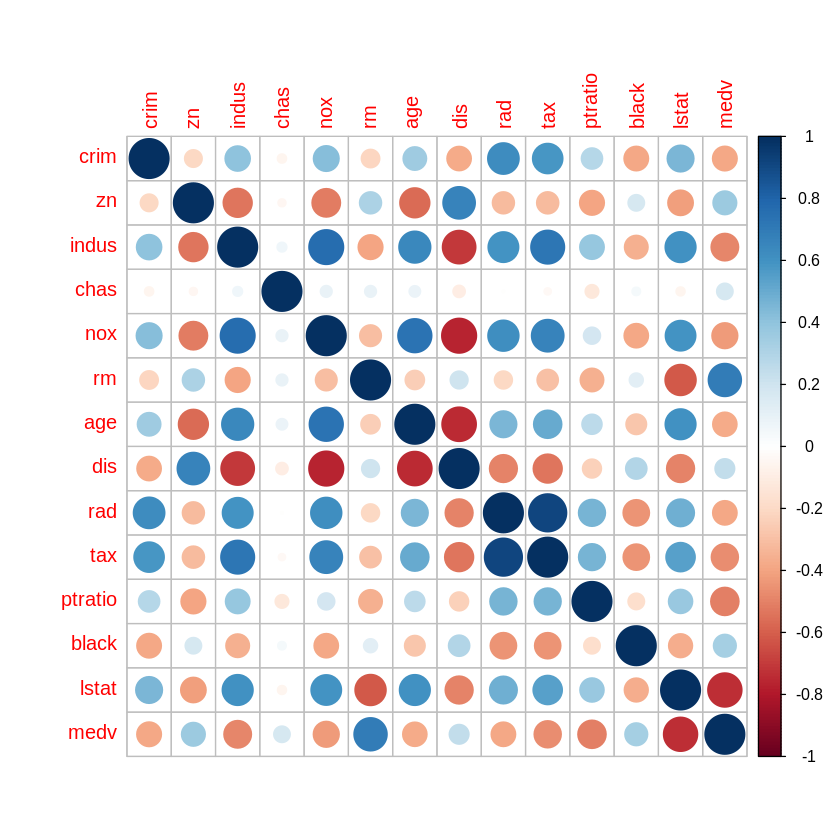

In [131]:
corrplot(cor(BostonHousing))

In [132]:

#set a seed 
set.seed(123)

#Split the data , `split()` assigns a booleans to a new column based on the SplitRatio specified. 

split = sample.split(BostonHousing,SplitRatio =0.75)


train = subset(BostonHousing,split==TRUE)
test = subset(BostonHousing,split==FALSE)

# now we are using 75% of the data for training or model and 25% for testing our model

In [133]:
#good practice to test your code! print out heads of whole set and training set and
# check that the code above worked and the training set is 25% smaller!
dim(BostonHousing)
dim(train)

[1] 506  14

[1] 362  14

## let's build a model that only takes one variable
### lstat seems to be a reasonable choice looking at the correlation plot

In [134]:
model_1 = lm(medv ~ lstat, data=train)
summary(model_1)




Call:
lm(formula = medv ~ lstat, data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.041  -3.870  -1.417   1.849  24.016 

Coefficients:
            Estimate Std. Error t value            Pr(>|t|)    
(Intercept) 34.48246    0.65026   53.03 <0.0000000000000002 ***
lstat       -0.95707    0.04488  -21.33 <0.0000000000000002 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.08 on 360 degrees of freedom
Multiple R-squared:  0.5582,	Adjusted R-squared:  0.5569 
F-statistic: 454.8 on 1 and 360 DF,  p-value: < 0.00000000000000022


## let's build one with two variables - I am ignoring the quantitative qualitative stuff, you'll see why

In [135]:
model_2 = lm(medv ~  rm + lstat, data=train)
summary(model_2)


Call:
lm(formula = medv ~ rm + lstat, data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-18.2502  -3.3366  -0.7792   2.1320  27.4911 

Coefficients:
            Estimate Std. Error t value            Pr(>|t|)    
(Intercept) -3.02394    3.59227  -0.842                 0.4    
rm           5.29601    0.50084  10.574 <0.0000000000000002 ***
lstat       -0.62851    0.05005 -12.557 <0.0000000000000002 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.317 on 359 degrees of freedom
Multiple R-squared:  0.6631,	Adjusted R-squared:  0.6612 
F-statistic: 353.3 on 2 and 359 DF,  p-value: < 0.00000000000000022


## let's compare the two

In [136]:
options(scipen=999)
anova(model_1, model_2)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
360,13307.72,NA,NA,NA,NA
359,10147.28,1,3160.441,111.8131,0.00000000000000000000006246405


## now the interaction one - now you see why I used rm and lstat - according to the correlation model they are correlated, lets see whether it changed model_2 if we make them interact with each other


In [225]:
model_3 = lm(medv ~  rm * lstat, data=train)
summary(model_3)
#nice one!


Call:
lm(formula = medv ~ rm * lstat, data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-23.0404  -2.5082  -0.4268   2.0801  28.2849 

Coefficients:
             Estimate Std. Error t value             Pr(>|t|)    
(Intercept) -29.94458    3.75851  -7.967   0.0000000000000219 ***
rm            9.75705    0.56059  17.405 < 0.0000000000000002 ***
lstat         2.19450    0.23698   9.260 < 0.0000000000000002 ***
rm:lstat     -0.48208    0.03982 -12.106 < 0.0000000000000002 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.485 on 358 degrees of freedom
Multiple R-squared:  0.761,	Adjusted R-squared:  0.759 
F-statistic: 379.9 on 3 and 358 DF,  p-value: < 0.00000000000000022


Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
358,7199.765,NA,NA,NA,NA
357,6589.669,1,610.0957,33.05237,0.00000001927027


## now model with all variables

In [138]:

model_all = lm(medv ~  ., data=train)

In [139]:
summary(model_all)


Call:
lm(formula = medv ~ ., data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-16.4182  -2.4857  -0.3826   1.5040  24.2247 

Coefficients:
              Estimate Std. Error t value             Pr(>|t|)    
(Intercept)  32.014799   5.797019   5.523     0.00000006546324 ***
crim         -0.108156   0.033650  -3.214             0.001431 ** 
zn            0.039578   0.015572   2.542             0.011465 *  
indus        -0.014607   0.067178  -0.217             0.827999    
chas          3.596486   0.917827   3.918             0.000107 ***
nox         -18.362276   4.209855  -4.362     0.00001702216957 ***
rm            4.229451   0.469245   9.013 < 0.0000000000000002 ***
age           0.001901   0.015649   0.121             0.903374    
dis          -1.409436   0.223701  -6.301     0.00000000089659 ***
rad           0.252868   0.070250   3.600             0.000365 ***
tax          -0.010172   0.003953  -2.573             0.010488 *  
ptratio      -0.900114   0.144507

### so we found our best model! 

In [140]:
anova(model_all, model_3)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
348,6857.830,NA,NA,NA,NA
358,7199.765,-10,-341.9349,1.735146,0.07162129


In [141]:
# just for fun

bad_model = lm(medv ~ chas + dis, data=train)
summary(bad_model)


Call:
lm(formula = medv ~ chas + dis, data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-13.953  -5.593  -1.423   2.577  30.654 

Coefficients:
            Estimate Std. Error t value             Pr(>|t|)    
(Intercept)  17.0714     0.9652  17.686 < 0.0000000000000002 ***
chas          7.2250     1.7137   4.216         0.0000315152 ***
dis           1.2631     0.2179   5.797         0.0000000148 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8.629 on 359 degrees of freedom
Multiple R-squared:  0.1126,	Adjusted R-squared:  0.1076 
F-statistic: 22.77 on 2 and 359 DF,  p-value: 0.0000000004894


### lets compare MAE, RMSE between different models (R²is printed in summary, you see that)

In [142]:
# MSE of model_1
mean(residuals(model_1)^2)
#RMSE of model_1
sqrt(mean(residuals(model_1)^2))

#MSE of model_3
mean(residuals(model_3)^2) 

#RMSE of model_3
sqrt(mean(residuals(model_3)^2))



[1] 36.76165

[1] 6.063139

[1] 19.88885

[1] 4.459692

## Now  Let's do the fun stuff - predicting!

In [227]:

# I am just storing all the predicted values using different models in the same testset
test$predicted.medv_1 = predict(model_1,test)
test$predicted.medv_2 = predict(model_2,test)
test$predicted.medv_3 = predict(model_3,test)
test$predicted.medv_4 = predict(model_4,test)
test$predicted.medv_all = predict(model_all,test)
test$predicted.medv_bad = predict(bad_model,test)
head(test)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,⋯,black,lstat,medv,predicted.medv_1,predicted.medv_2,predicted.medv_3,predicted.medv_all,predicted.medv_bad,predicted.medv_best,predicted.medv_4
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,⋯,394.63,2.94,33.4,31.66869,32.18969,34.86872,28.67656,24.72829,33.64684,33.64684
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,⋯,396.90,5.33,36.2,29.38130,31.47665,33.12162,28.20894,24.72829,32.07036,32.07036
8,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,⋯,396.90,19.15,27.1,16.15466,17.62697,15.32172,19.72460,24.58721,18.08568,18.08568
11,0.22489,12.5,7.87,0,0.524,6.377,94.3,6.3467,5,311,⋯,392.52,20.45,15.0,14.91048,17.89558,14.28575,19.36495,25.08763,17.16349,17.16349
18,0.78420,0.0,8.14,0,0.538,5.990,81.7,4.2579,4,307,⋯,386.75,14.67,17.5,20.44231,19.47884,18.33149,17.08051,22.44936,16.98016,16.98016
19,0.80271,0.0,8.14,0,0.538,5.456,36.6,3.7965,4,307,⋯,288.99,11.69,20.2,23.29437,18.52374,18.19621,15.88080,21.86659,16.80910,16.80910


In [237]:
medv = test$medv   # the actual value of medv
medv_predicted = test$predicted.medv_3 #predicted value using model_1 - insert other models here to use predited values of other models

error = medv - medv_predicted

#error

In [238]:
#this calculates R¹
rss <- sum((medv_predicted - medv) ^ 2)
tss <- sum((medv - mean(medv)) ^ 2)
rsq <- 1 - rss/tss

In [239]:
rsq

[1] 0.6874129

In [46]:
rmse = function(error) {
    
    sqrt(mean(error^2))
    
}

mae = function(error) {
    
    mean(abs(error^2))
    
}

In [79]:
rmse(error)
mae(error)

[1] 6.550503

[1] 42.90909

## you can play around yourself and calculate different R², MAE and RMSE for the training data of your different models - the point is that you see that all those values get worse when predicting medv on the training data!

## now lets do stepwise selection to see how it works

In [121]:
library(leaps)


Subset selection object
Call: regsubsets.formula(medv ~ ., data = train, nbest = 1, nvmax = NULL, 
    force.in = NULL, force.out = NULL, method = "exhaustive")
13 Variables  (and intercept)
        Forced in Forced out
crim        FALSE      FALSE
zn          FALSE      FALSE
indus       FALSE      FALSE
chas        FALSE      FALSE
nox         FALSE      FALSE
rm          FALSE      FALSE
age         FALSE      FALSE
dis         FALSE      FALSE
rad         FALSE      FALSE
tax         FALSE      FALSE
ptratio     FALSE      FALSE
black       FALSE      FALSE
lstat       FALSE      FALSE
1 subsets of each size up to 13
Selection Algorithm: exhaustive
          crim zn  indus chas nox rm  age dis rad tax ptratio black lstat
1  ( 1 )  " "  " " " "   " "  " " " " " " " " " " " " " "     " "   "*"  
2  ( 1 )  " "  " " " "   " "  " " "*" " " " " " " " " " "     " "   "*"  
3  ( 1 )  " "  " " " "   " "  " " "*" " " " " " " " " "*"     " "   "*"  
4  ( 1 )  " "  " " " "   "*"  " " "*" " " "

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
1 ( 1 ),,,,,,,,,,,,,*
2 ( 1 ),,,,,,*,,,,,,,*
3 ( 1 ),,,,,,*,,,,,*,,*
4 ( 1 ),,,,*,,*,,,,,*,,*
5 ( 1 ),,,,,*,*,,*,,,*,,*
6 ( 1 ),,,,*,*,*,,*,,,*,,*
7 ( 1 ),,,,*,*,*,,*,,,*,*,*
8 ( 1 ),,*,,*,*,*,,*,,,*,*,*
9 ( 1 ),*,,,*,*,*,,*,*,,*,*,*
10 ( 1 ),*,,,*,*,*,,*,*,*,*,*,*


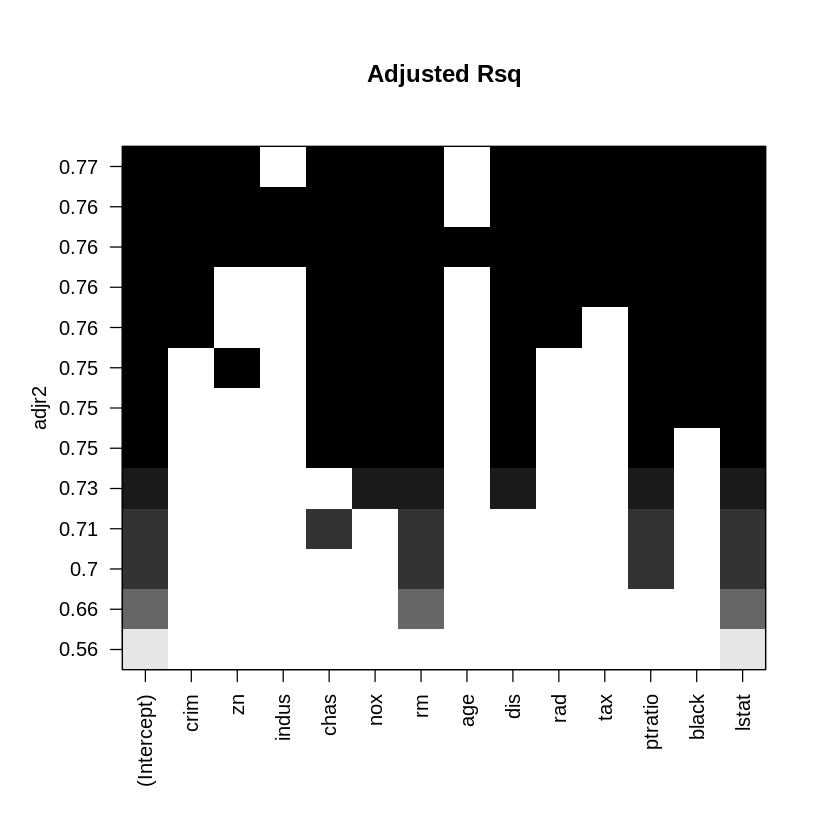

In [122]:

regsubsets.out <- regsubsets( medv ~ .,
                              data = train,
                              nbest = 1,
                              nvmax = NULL,
                              force.in = NULL, force.out = NULL,
                              method = 'exhaustive')
summary(regsubsets.out)
  
as.data.frame(summary(regsubsets.out)$outmat)
plot(regsubsets.out, scale='adjr2', main='Adjusted Rsq')

In [153]:
#apparently using all variables apart from age and indus yields he highest r², lets check that:
step_model = lm(medv ~ . -indus -age, data=train)
summary(step_model)



Call:
lm(formula = medv ~ . - indus - age, data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-16.452  -2.455  -0.433   1.503  24.260 

Coefficients:
             Estimate Std. Error t value             Pr(>|t|)    
(Intercept)  32.00785    5.69897   5.616      0.0000000397838 ***
crim         -0.10799    0.03347  -3.226             0.001373 ** 
zn            0.03970    0.01530   2.595             0.009864 ** 
chas          3.57843    0.90507   3.954      0.0000931160392 ***
nox         -18.45322    3.87407  -4.763      0.0000027949868 ***
rm            4.25239    0.44775   9.497 < 0.0000000000000002 ***
dis          -1.40690    0.20543  -6.849      0.0000000000336 ***
rad           0.25683    0.06624   3.877             0.000126 ***
tax          -0.01055    0.00351  -3.005             0.002852 ** 
ptratio      -0.90359    0.14107  -6.405      0.0000000004835 ***
black         0.00942    0.00310   3.038             0.002557 ** 
lstat        -0.47129    0.05439  -8.665 

### seems like its rounding. r² only tiny bit better than using all - lets see whether statistically significant

In [155]:
anova(step_model, model_all)

#aaaand nope its not

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
350,6859.12,NA,NA,NA,NA
348,6857.83,2,1.290177,0.03273497,0.967798


In [157]:
anova(model_3, step_model)

#p value on the border - probably not worth it using so many more variables

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
358,7199.765,NA,NA,NA,NA
350,6859.120,8,340.6448,2.172758,0.02899691


# Guys, I apologise - the caret library actually has R2, RMSE and RME built in functions !! so no need to do it manually - but it was still good practice

## also - it might come up in exam to calculate something by hand - but there is google for that...

In [180]:
library(caret)

r2_test = R2(medv_predicted, medv) 
r2_test

rsme_test = RMSE(medv_predicted, medv) 
mae_test = MAE(medv_predicted, medv) 

[1] 0.5126338